In [50]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt 
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
df = pd.read_csv('../routes/cs_2023-11-22.csv')
df_adsb = pd.read_csv('../routes/cs_2023-11-22-2.csv')


In [56]:
unique_ids = df['id'].unique()
print(f'There are {len(unique_ids)} unique ids')
id = unique_ids[47]
print(f'Selected id: {id}')

There are 15258 unique ids
Selected id: 0101DDMSR988


In [57]:
df_id = df[df['id'] == id]
df_adsb_id = df_adsb[df_adsb['id'] == id]


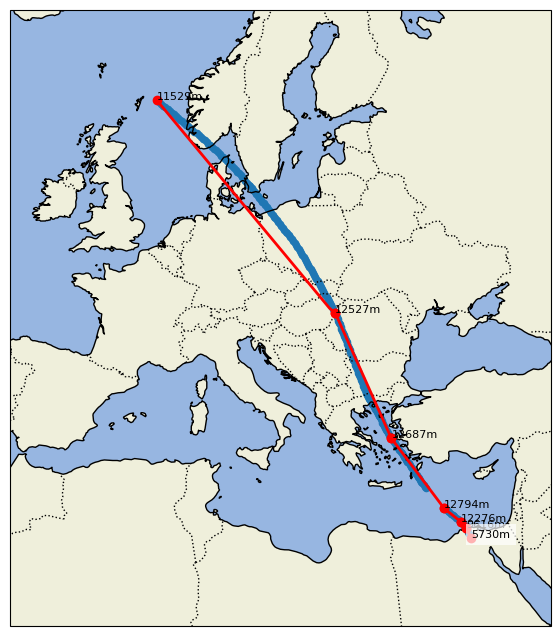

In [58]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_flight_trajectory(df_id, df_adsb_id = None):
    """
    Plot flight trajectory using Cartopy with altitude labels at turning points
    
    Args:
        df_id (pd.DataFrame): DataFrame containing trajectory points for a single flight ID
    """
    
    # Create figure and axis with Lambert Conformal projection centered on Europe
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=15.0, 
                                                  central_latitude=45.0))
    
    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set map extent to cover trajectory with some padding
    lon_min = min(df_id['from_lon'].min(), df_id['to_lon'].min()) - 5
    lon_max = max(df_id['from_lon'].max(), df_id['to_lon'].max()) + 5
    lat_min = min(df_id['from_lat'].min(), df_id['to_lat'].min()) - 5
    lat_max = max(df_id['from_lat'].max(), df_id['to_lat'].max()) + 5
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Plot trajectory segments
    for _, row in df_id.iterrows():
        # Plot line segment
        plt.plot([row['from_lon'], row['to_lon']], 
                [row['from_lat'], row['to_lat']],
                color='red', linewidth=2, marker='o',
                transform=ccrs.PlateCarree())
        
        # Add altitude labels at turning points
        plt.text(row['from_lon'], row['from_lat'], 
                f"{row['from_alt']:.0f}m",
                transform=ccrs.PlateCarree(),
                fontsize=8)
    
    # Add final point altitude
    plt.text(df_id.iloc[-1]['to_lon'], df_id.iloc[-1]['to_lat'],
             f"{df_id.iloc[-1]['to_alt']:.0f}m",
             transform=ccrs.PlateCarree(),
             fontsize=8,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
             zorder=5)
    
    if df_adsb_id is not None:
        # Plot points with color representing time progression
        plt.scatter(df_adsb_id['lon'], df_adsb_id['lat'],
                    s=20,
                    transform=ccrs.PlateCarree())
    
    plt.grid(True)
    
    return plt.gcf()

# Plot the trajectory for the selected flight
fig = plot_flight_trajectory(df_id, df_adsb_id)
plt.show()


KeyError: 'lon'

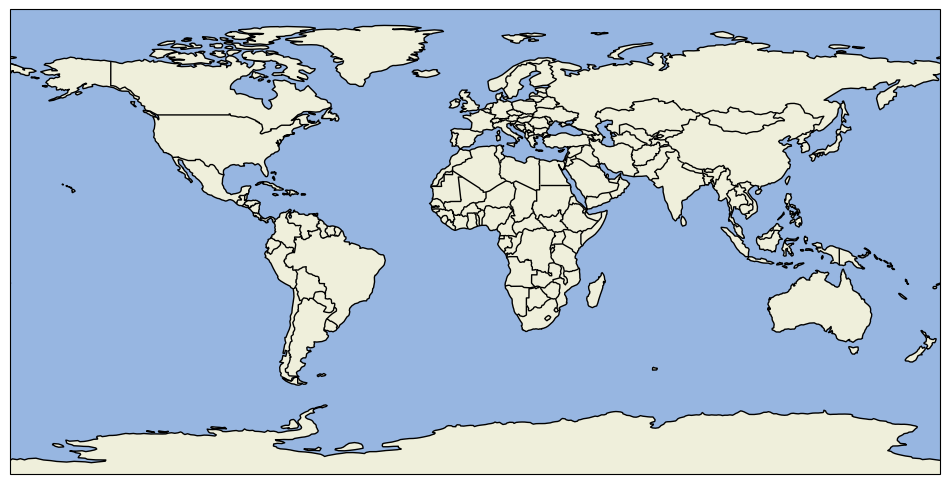

In [59]:
def plot_adsb_points(df_id):
    # Create figure and projection
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    
    # Set map extent based on data bounds
    lon_min = df_id['lon'].min() - 5
    lon_max = df_id['lon'].max() + 5
    lat_min = df_id['lat'].min() - 5
    lat_max = df_id['lat'].max() + 5
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Create color map based on timestamps
    timestamps = df_id['timestamp'].values
    norm = plt.Normalize(timestamps.min(), timestamps.max())
    
    # Plot points with color representing time progression
    scatter = plt.scatter(df_id['lon'], df_id['lat'],
                         c=timestamps, 
                         cmap='viridis',
                         norm=norm,
                         s=50,
                         transform=ccrs.PlateCarree())
    
    plt.colorbar(scatter, label='Timestamp')
    plt.title(f"ADS-B Points for {df_id.iloc[0]['id']}")
    plt.grid(True)
    
    return plt.gcf()

# Plot the ADS-B points
fig = plot_adsb_points(df_id)
plt.show()
